# Question 1

# Introduction

In the following, CRISP-DM process will be applied for a finding an insight about the charactistics of visitors of StackOverflow based on their behaviours.

# Step 1 Business Understanding

The business question defined is: 
## What are hottest programming or scripting languages in 2020?


Check out current python version

In [2]:
import sys
print(sys.version)

3.6.3 | packaged by conda-forge | (default, Dec  9 2017, 04:28:46) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


# Step 2 Data Understanding

Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import proj1_func_library as my_lib
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline


Read the datasets

In [4]:
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')

df.shape, schema.shape

((64461, 61), (61, 2))

In [5]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


To review some data of survey data

In [6]:
pd.set_option("display.max_columns", None)

df.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


#### Seems the variable "LanguageWorkedWith" is one we are interested in. Let's review it.

In [7]:
df["LanguageWorkedWith"].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                                           1073
HTML/CSS;JavaScript                                                                                                    900
C#;HTML/CSS;JavaScript;SQL                                                                                             856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                  754
HTML/CSS;JavaScript;TypeScript                                                                                         697
Python                                                                                                                 651
Java                                                                                                                   575
HTML/CSS;JavaScript;PHP                                                                                                525
C#              

#### However, obsviously the variable is a multiple choice for respondents. We have to break and count them as individual.

# Step 3 Data Preparation

#### Extract each language from variable "LanguageWorkedWith" and add to a new dictionary "langWorkedWithDict".

In [8]:
# Create a dictionary
lang_worked_with_dict = my_lib.conv_multiple_val_to_dict(df, "LanguageWorkedWith", ";")

# Print out the result
lang_worked_with_dict

{'C#': 18041,
 'HTML/CSS': 36181,
 'JavaScript': 38822,
 'Swift': 3397,
 'Objective-C': 2340,
 'Python': 25287,
 'Ruby': 4046,
 'SQL': 31413,
 'Java': 23074,
 'PHP': 15007,
 'C': 12487,
 'TypeScript': 14578,
 'Bash/Shell/PowerShell': 18980,
 'Kotlin': 4468,
 'R': 3288,
 'VBA': 3499,
 'Perl': 1796,
 'Scala': 2052,
 'C++': 13707,
 'Go': 5038,
 'Haskell': 1222,
 'Rust': 2929,
 'Dart': 2280,
 'Julia': 519,
 'Assembly': 3553}

#### Convert dictionary to DataFrame

In [9]:
lang_worked_with_df = pd.DataFrame.from_dict(lang_worked_with_dict, orient="index", columns=['count']).rename_axis("method")
lang_worked_with_df = lang_worked_with_df.sort_values("count", ascending=False)

lang_worked_with_df

,count
method,
JavaScript,38822
HTML/CSS,36181
SQL,31413
Python,25287
Java,23074
Bash/Shell/PowerShell,18980
C#,18041
PHP,15007
TypeScript,14578


# Step 4 Modeling

(This question does not require machine learning, descriptive statistics is already applied.)

# Step 5 Evaluation

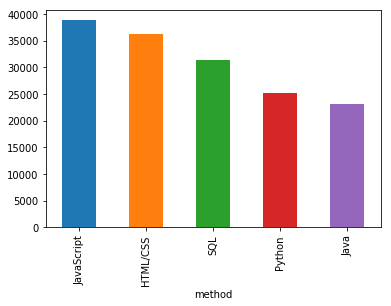

In [10]:
lang_worked_with_df['count'].head(5).plot(kind='bar')

#### From the diagram above, we have observed that "JavaScript" followed by "HTML/CSS" were mentioned by almost 40,000 respondents, 2/3 people, as their language which they worked on. So "JavaScript" & "HTML/CSS" are the number ONE and TWO of hottest language.

#### Secondly, "SQL", "Python" and "Java" follow by the first two languages. They are also hot languages because almost half of respondents marked them as working languages.

#### Maybe you have noted that why the total number of respondents is over 60,000? It is because this variable contains multiple choices. So respondents can select more than one option.

# Step 6 Deploy (Communication)

After analysis on result of survey, the top 5 programming languages used by most participants to work with are:
1. JavaScript
2. CSS/HTML
3. SQL
4. Python
5. Java
